# Combining Hugging Face datasets with dask

> Using 🤗 datasets in combination with dask 

- toc: true 
- badges: false
- comments: true
- categories: [huggingface, huggingface-datasets, dask]
- search_exclude: false
- badges: true

Hugging Face datasets is a super useful library for loading, processing and sharing datasets with other people. 

For many pre-processing steps it works beautifully. The one area where it can be a bit trickier to use is for EDA style analysis. This column-wise EDA is often important as an early step in working with some data or for preparing a data card. 

Fortunately combining datasets and another data library, [dask](https://www.dask.org/) works pretty smoothly. This isn't intended to be a full intro to either datasets or dask but hopefully gives you a sense of how both libaries work and how they can complement each other. 

First, make sure we have the required libraries. [Rich](https://rich.readthedocs.io/en/stable/) is there for a little added visual flair ✨ 

In [53]:
%%capture
!pip install datasets toolz rich[jupyter] dask

In [1]:
%load_ext rich

## Load some data

For this example we will use a the [blbooksgenre dataset](https://huggingface.co/datasets/blbooksgenre) that contains metadata about some digitised books from the British Library. This collection also includes some annotations for the genre of the book which we could use to train a machine learning model. 

We can load a dataset hosted on the Hugging Face hub by using the `load_dataset` function.

In [2]:
from datasets import load_dataset

In [3]:
ds = load_dataset("blbooksgenre", "annotated_raw", split="train")

Reusing dataset bl_books_genre (/Users/dvanstrien/.cache/huggingface/datasets/bl_books_genre/annotated_raw/1.1.0/1e01f82403b3d9344121c3b81e5ad7c130338b250bf95dad4c6ab342c642dbe8)


Since we requested only the train split we get back a `Dataset`

In [57]:
ds

Dataset({
    features: ['BL record ID', 'Name', 'Dates associated with name', 'Type of name', 'Role', 'All names', 'Title', 'Variant titles', 'Series title', 'Number within series', 'Country of publication', 'Place of publication', 'Publisher', 'Date of publication', 'Edition', 'Physical description', 'Dewey classification', 'BL shelfmark', 'Topics', 'Genre', 'Languages', 'Notes', 'BL record ID for physical resource', 'classification_id', 'user_id', 'subject_ids', 'annotator_date_pub', 'annotator_normalised_date_pub', 'annotator_edition_statement', 'annotator_FAST_genre_terms', 'annotator_FAST_subject_terms', 'annotator_comments', 'annotator_main_language', 'annotator_other_languages_summaries', 'annotator_summaries_language', 'annotator_translation', 'annotator_original_language', 'annotator_publisher', 'annotator_place_pub', 'annotator_country', 'annotator_title', 'Link to digitised book', 'annotated', 'Type of resource', 'created_at', 'annotator_genre'],
    num_rows: 4398
})

We can see this has a bunch of columns. One that is of interest is the `Data of publication` column. Since we could use this dataset to train some type of classifier we may want to check whether we have enough examples across different time periods in the dataset. 

In [58]:
ds[0]["Date of publication"]

'1879'

### Using toolz to calculate frequencies for a column

One quick way we can get the frequency count for a column is using the wonderful [toolz](https://toolz.readthedocs.io/en/latest/index.html) library 

If our data fits in memory, we can simply pass in a column containing a categorical value to a frequency function to get a frequency count. 

In [60]:
from toolz import frequencies, topk

In [7]:
dates = ds["Date of publication"]

In [97]:
# collapse_hide

frequencies(dates)

{
    '1879': 99,
    '1774': 5,
    '1765': 5,
    '1877': 69,
    '1893': 222,
    '1891': 148,
    '1827': 29,
    '1868': 42,
    '1878': 72,
    '1895': 189,
    '1897': 120,
    '1899': 104,
    '1896': 174,
    '1876': 48,
    '1812': 13,
    '1799': 8,
    '1830': 32,
    '1870': 42,
    '1894': 155,
    '1864': 28,
    '1855': 42,
    '1871': 42,
    '1836': 37,
    '1883': 51,
    '1880': 111,
    '1884': 69,
    '1822': 16,
    '1856': 38,
    '1872': 42,
    '1875': 57,
    '1844': 35,
    '1890': 134,
    '1886': 43,
    '1840': 15,
    '1888': 109,
    '1858': 43,
    '1867': 53,
    '1826': 24,
    '1800': 3,
    '1851': 43,
    '1838': 14,
    '1824': 20,
    '1887': 58,
    '1874': 42,
    '1857': 44,
    '1873': 34,
    '1837': 16,
    '1846': 32,
    '1881': 55,
    '1898': 104,
    '1906': 4,
    '1892': 134,
    '1869': 25,
    '1885': 69,
    '1882': 71,
    '1863': 55,
    '1865': 53,
    '1635': 3,
    '1859': 39,
    '1818': 17,
    '1845': 28,
    '1852': 43,
    '1841': 23,
    '1842': 29,
    '1848': 28,
    '1828': 23,
    '1850': 38,
    '1860': 45,
    '1889': 140,
    '1815': 5,
    '1861': 28,
    '1814': 13,
    '1843': 28,
    '1817': 12,
    '1819': 16,
    '1853': 34,
    '1833': 5,
    '1854': 36,
    '1839': 33,
    '1803': 7,
    '1835': 14,
    '1813': 8,
    '1695': 4,
    '1809-1811': 5,
    '1832': 9,
    '1823': 17,
    '1847': 28,
    '1816': 8,
    '1806': 5,
    '1866': 26,
    '1829': 13,
    '1791': 5,
    '1637': 5,
    '1821': 4,
    '1807': 14,
    '1862': 22,
    '1795': 5,
    '1834': 12,
    '1831': 10,
    '1849': 13,
    '1811': 1,
    '1825': 1,
    '1809': 3,
    '1905': 1,
    '1808': 1,
    '1900': 5,
    '1892-1912': 1,
    '1804': 4,
    '1769': 5,
    '1910': 1,
    '1805': 5,
    '1802': 3,
    '1871-': 1,
    '1901': 5,
    '1884-1909': 1,
    '1873-1887': 1,
    '1979': 1,
    '1852-1941': 1,
    '1903': 1,
    '1871-1873': 1,
    '1810': 3,
    '1907': 1,
    '1820': 5,
    '1789': 5
}

## Make it parallel!

If our data doesn't fit in memory or we want to do things in parallel we might want to use a slightly different approach. This is where dask can play a role. 

Dask offers a number of different collection abstractions that make it easier to do things in parallel. This includes dask bag.

First we'll create a dask client here, I won't dig into the details of this here but you can get a good overview in the [getting started](https://www.dask.org/get-started) pages. 

In [9]:
from distributed import Client

In [10]:
client = Client()

Since we don't want to load all of our data into memory we can great a generator that will yield one row at a time. In this case we'll start by exploring the `Title` column 

In [63]:
def yield_titles():
    for row in ds:
        yield row["Title"]

We can see that this returns a generator 

In [64]:
yield_titles()

<generator object yield_titles at 0x7ffc28fdc040>

In [65]:
next(iter(yield_titles()))

'The Canadian farmer. A missionary incident [Signed: W. J. H. Y, i.e. William J. H. Yates.]'

We can store this in a titles variable. 

In [21]:
titles = yield_titles()

We'll now import dask bag. 

import dask.bag as db

We can create a dask bag object using the `from_sequence` method. 

In [69]:
bag = db.from_sequence(titles)

In [70]:
bag

dask.bag<from_sequence, npartitions=1>

We can look at an example using the `take` method

In [68]:
bag.take(1)

(
    [
        'The',
        'Canadian',
        'farmer.',
        'A',
        'missionary',
        'incident',
        '[Signed:',
        'W.',
        'J.',
        'H.',
        'Y,',
        'i.e.',
        'William',
        'J.',
        'H.',
        'Yates.]'
    ],
)

dask bag has a bunch of handy methods for processing data (some of these we could also do in 🤗 datasets but others are not available as specific methods in datasets). 

For example we can make sure we only have unique titles using the `distinct` method. 

In [26]:
unique_titles = bag.distinct()

In [27]:
unique_titles.take(4)

(
    'The Canadian farmer. A missionary incident [Signed: W. J. H. Y, i.e. William J. H. Yates.]',
    'A new musical Interlude, called the Election [By M. P. Andrews.]',
    'An Elegy written among the ruins of an Abbey. By the author of the Nun [E. Jerningham]',
    "The Baron's Daughter. A ballad by the author of Poetical Recreations [i.e. William C. Hazlitt] . F.P"
)

Similar to 🤗 datasets we have a map method that we can use to apply a function to all of our examples. In this case we split the title text into individual words. 


In [39]:
title_words_split = unique_titles.map(lambda x: x.split(" "))

In [71]:
title_words_split.take(2)

(
    [
        'The',
        'Canadian',
        'farmer.',
        'A',
        'missionary',
        'incident',
        '[Signed:',
        'W.',
        'J.',
        'H.',
        'Y,',
        'i.e.',
        'William',
        'J.',
        'H.',
        'Yates.]'
    ],
    [
        'A',
        'new',
        'musical',
        'Interlude,',
        'called',
        'the',
        'Election',
        '[By',
        'M.',
        'P.',
        'Andrews.]'
    ]
)

We can see we now have all our words in a list. Helpfully dask bag has a `flatten` method. This will consume our lists and put all the words in a single sequence. 

In [73]:
flattend_title_words = title_words_split.flatten()

In [74]:
flattend_title_words.take(2)

('The', 'Canadian')

We could now use the `frequencies` method to get the top words. 

In [75]:
freqs = flattend_title_words.frequencies(sort=True)

In [76]:
freqs

dask.bag<sorted, npartitions=1>

Since dask bag methods are lazy by default nothing has actually been calculated yet. We could just grab the top 10 words. 

In [77]:
top_10_words = freqs.topk(10, key=1)

If we want the results of something we call `compute` which will call all of the chained methods on our bag. 


In [78]:
top_10_words.compute()

[
    ('of', 808),
    ('the', 674),
    ('and', 550),
    ('...', 518),
    ('in', 402),
    ('van', 306),
    ('etc', 301),
    ('de', 258),
    ('en', 258),
    ('a', 231)
]

We could also do the same with lowered version 

In [79]:
lowered_title_words = flattend_title_words.map(lambda x: x.lower())

In [80]:
freqs = lowered_title_words.frequencies(sort=True)

The visualize method gives you some insights into how the computation is managed by dask. 

In [81]:
freqs.visualize(engine="cytoscape", optimize_graph=True)

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'BT', 'nodeSep': 10, 'edgeSep': 10, 'spacingFact…

## Moving from datasets to a dask dataframe 

For some operations, dask bag is super easy to use. Sometimes though you will hurt your brain trying to crow bar your problem into the dask bag API 😵‍💫 This is where dask dataframes come in! Using parquet, we can easily save our 🤗 dataset as a parquet file. 

In [44]:
ds.to_parquet("genre.parquet")

3583138

In [84]:
import dask.dataframe as dd

and load from this file

In [85]:
ddf = dd.read_parquet("genre.parquet")

As dask dataframe works quite similar to a pandas dataframe. It is lazy by default so if we just print it out

In [86]:
ddf

,BL record ID,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,Country of publication,Place of publication,Publisher,Date of publication,Edition,Physical description,Dewey classification,BL shelfmark,Topics,Genre,Languages,Notes,BL record ID for physical resource,classification_id,user_id,subject_ids,annotator_date_pub,annotator_normalised_date_pub,annotator_edition_statement,annotator_FAST_genre_terms,annotator_FAST_subject_terms,annotator_comments,annotator_main_language,annotator_other_languages_summaries,annotator_summaries_language,annotator_translation,annotator_original_language,annotator_publisher,annotator_place_pub,annotator_country,annotator_title,Link to digitised book,annotated,Type of resource,created_at,annotator_genre
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,object,bool,int64,datetime64[ns],int64
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


You'll see we don't actually get back any data. If we use head we get the number of examples we ask for. 

In [87]:
ddf.head(3)

,BL record ID,Name,Dates associated with name,Type of name,Role,All names,Title,Variant titles,Series title,Number within series,...,annotator_original_language,annotator_publisher,annotator_place_pub,annotator_country,annotator_title,Link to digitised book,annotated,Type of resource,created_at,annotator_genre
0,014603046,"Yates, William Joseph H.",,person,,"[Yates, William Joseph H. [person] , Y, W. J....",The Canadian farmer. A missionary incident [Si...,,,,...,,NONE,London,enk,The Canadian farmer. A missionary incident [Si...,http://access.bl.uk/item/viewer/ark:/81055/vdc...,True,0,2020-08-11 14:30:33,0
1,014603046,"Yates, William Joseph H.",,person,,"[Yates, William Joseph H. [person] , Y, W. J....",The Canadian farmer. A missionary incident [Si...,,,,...,,NONE,London,enk,The Canadian farmer. A missionary incident [Si...,http://access.bl.uk/item/viewer/ark:/81055/vdc...,True,0,2021-04-15 09:53:23,0
2,014603046,"Yates, William Joseph H.",,person,,"[Yates, William Joseph H. [person] , Y, W. J....",The Canadian farmer. A missionary incident [Si...,,,,...,,NONE,London,enk,The Canadian farmer. A missionary incident [Si...,http://access.bl.uk/item/viewer/ark:/81055/vdc...,True,0,2020-09-24 14:27:54,0


We have some familiar methods from pandas available to us

In [49]:
ddf = ddf.drop_duplicates(subset="Title")

As an example of something that would be a bit tricky in datasets, we can see how to groupby the mean title length by year of publication. First we create a new column for title length

In [89]:
ddf["title_len"] = ddf["Title"].map(lambda x: len(x))

We can then groupby the date of publication 

In [90]:
grouped = ddf.groupby("Date of publication")

and then calculate the mean `title_len` 

In [91]:
mean_title_len = grouped["title_len"].mean()

To actually compute this value we call the `compute` method 

In [92]:
mean_title_len.compute()

Date of publication
1635    248.0
1637     67.0
1695     63.0
1765     86.0
1769     20.0
        ...  
1905    141.0
1906    225.0
1907    142.0
1910     65.0
1979     43.0
Name: title_len, Length: 124, dtype: float64

We can also create a plot in the usual way 

<AxesSubplot:xlabel='Date of publication'>

<Figure size 432x288 with 1 Axes>

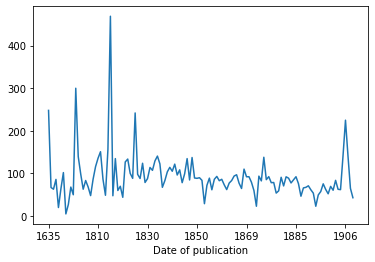

In [93]:
mean_title_len.compute().plot()

This was a very quick overview. The [dask docs](https://www.dask.org/get-started) go into much more detail as do the Hugging Face [datasets docs](https://huggingface.co/docs/datasets/). 
